#Importing Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip -u "/content/drive/MyDrive/archive.zip" -d "/content/sample_data/"

Archive:  /content/drive/MyDrive/archive.zip
  inflating: /content/sample_data/data.csv  


# Data Preprocessing

In [ ]:
import pandas as pd
data = pd.read_csv('/content/sample_data/data.csv')
data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [ ]:
data.shape

(6819, 96)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [ ]:
data.columns


Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

In [ ]:
print('Number of duplicated data values in Company Bankruptcy Prediction Dataset -', data.duplicated().sum())

Number of duplicated data values in Company Bankruptcy Prediction Dataset - 0


In [ ]:
data_null_or_not = data.isnull().sum()
print('Number of null data values in Company Bankruptcy Prediction Dataset -', len(data_null_or_not[data_null_or_not>0]))

Number of null data values in Company Bankruptcy Prediction Dataset - 0


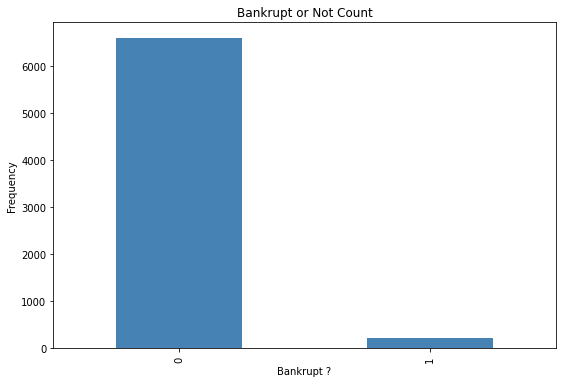

In [ ]:
import matplotlib.pyplot as plt

# plot a bar plot for each categorical feature count
categorical_label = data[data.columns[0]]
counts = categorical_label.value_counts().sort_index()
fig = plt.figure(figsize=(9, 6))
ax = fig.gca()
counts.plot.bar(ax = ax, color='steelblue')
ax.set_title('Bankrupt or Not Count')
ax.set_xlabel('Bankrupt ?') 
ax.set_ylabel("Frequency")    
       
plt.show()

In [ ]:
# Separate features and labels
features = data.columns[1:]
label = data.columns[0]
X, y = data[features], data[label]

#for n in range(0,2):
#    print("Company", str(n+1), "\n  Features:",list(X[n]), "\n  Label:", y[n])
print(data[label])

0       1
1       1
2       1
3       1
4       1
       ..
6814    0
6815    0
6816    0
6817    0
6818    0
Name: Bankrupt?, Length: 6819, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

print ('Training cases: %d\nTest cases: %d' % (X_train.shape[0], X_test.shape[0]))
X_test

Training cases: 5455
Test cases: 1364


,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
4929,0.481207,0.469418,0.513143,0.596679,0.596679,0.998884,0.797144,0.809037,0.303275,0.781412,...,0.752604,0.004379,0.623901,0.596676,0.837323,0.277101,0.026709,0.564731,1,0.050237
6424,0.501828,0.557894,0.552706,0.613644,0.613644,0.999065,0.797463,0.809380,0.303451,0.781650,...,0.811104,0.000284,0.624245,0.613641,0.841104,0.278183,0.026791,0.565158,1,0.037879
3807,0.517574,0.537505,0.559880,0.598351,0.598351,0.998982,0.797410,0.809328,0.303533,0.781589,...,0.799854,0.004069,0.623623,0.598350,0.840260,0.276186,0.026882,0.565555,1,0.074581
2011,0.521669,0.596162,0.580491,0.599101,0.599108,0.999007,0.797459,0.809386,0.303566,0.781650,...,0.830860,0.000933,0.624690,0.599099,0.842316,0.277461,0.026932,0.565750,1,0.045051
6728,0.492176,0.544320,0.533326,0.618105,0.618105,0.999083,0.797456,0.809338,0.303401,0.781598,...,0.800780,0.000517,0.623737,0.618104,0.840533,0.282763,0.027033,0.566098,1,0.022209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6363,0.503681,0.572231,0.557096,0.597522,0.597522,0.998977,0.797480,0.809397,0.303666,0.781666,...,0.817584,0.044393,0.623266,0.597517,0.841781,0.279660,0.026895,0.565611,1,0.029673
348,0.480086,0.544374,0.534022,0.597695,0.597695,0.998969,0.797410,0.809335,0.303561,0.781585,...,0.801731,0.004817,0.622650,0.597696,0.840446,0.278188,0.027376,0.566953,1,0.037838
5397,0.515575,0.572885,0.566519,0.608441,0.608498,0.999011,0.797470,0.809379,0.303576,0.781656,...,0.818974,0.000390,0.623949,0.608437,0.841560,0.277580,0.026801,0.565203,1,0.043627
2355,0.473895,0.538378,0.525617,0.610718,0.610718,0.999048,0.797556,0.809457,0.303649,0.781882,...,0.798702,0.006699,0.619432,0.610716,0.840237,0.278355,0.027696,0.567483,1,0.036579


In [ ]:
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=8)

# summarize class distribution
print("Before oversampling of unscaled data: ", Counter(y_train))
print("Before oversampling of unscaled data: ", Counter(y_test))

# fit predictor and target variable by applying the transform over unscaled train data
X_train, y_train = smote.fit_resample(X_train, y_train)
X_test, y_test = smote.fit_resample(X_test, y_test)

Before oversampling of unscaled data:  Counter({0: 5281, 1: 174})
Before oversampling of unscaled data:  Counter({0: 1318, 1: 46})


In [ ]:
print("After oversampling of unscaled data: ", Counter(y_train))
print("After oversampling of unscaled data: ", Counter(y_test))

After oversampling of unscaled data:  Counter({0: 5281, 1: 5281})
After oversampling of unscaled data:  Counter({0: 1318, 1: 1318})


In [ ]:
# performing preprocessing part
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
 
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Logistic Regression with PCA

In [ ]:
# Applying PCA function on training
# and testing set of X component
from sklearn.decomposition import PCA
 
pca = PCA(n_components = 2)
 
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
 
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.16490455, 0.08002452])

In [ ]:
from sklearn.linear_model import LogisticRegression 

# Set regularization rate
reg = 0.01

lgr_classifier = LogisticRegression(C=1/reg, solver="liblinear", random_state = 0) #LogisticRegression(random_state = 0)

# Fitting Logistic Regression To the training set
lgr_classifier.fit(X_train, y_train)

LogisticRegression(C=100.0, random_state=0, solver='liblinear')

In [ ]:
predictions_val = lgr_classifier.predict(X_test)
predictions_train = lgr_classifier.predict(X_train)
print('Validation Predicted labels: ', predictions_val)
print('Valdation Actual labels:    ' ,y_test)

print('Training Predicted labels: ', predictions_train)
print('Training Actual labels:    ' ,y_train)

Validation Predicted labels:  [0 0 0 ... 1 1 0]
Valdation Actual labels:     0       0
1       0
2       0
3       0
4       1
       ..
2631    1
2632    1
2633    1
2634    1
2635    1
Name: Bankrupt?, Length: 2636, dtype: int64
Training Predicted labels:  [0 0 0 ... 1 1 1]
Training Actual labels:     0        0
1        0
2        0
3        0
4        0
        ..
10557    1
10558    1
10559    1
10560    1
10561    1
Name: Bankrupt?, Length: 10562, dtype: int64


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
print('Accuracy for validation data: ', accuracy_score(y_test, predictions_val))
print('Accuracy for training data: ', accuracy_score(y_train, predictions_train))

Accuracy for validation data:  0.8649468892261002
Accuracy for training data:  0.8718045824654421


In [ ]:
from sklearn. metrics import classification_report

print('Validation Data Classification Report \n', classification_report(y_test, predictions_val))
print('Train Data Classification Report \n', classification_report(y_train, predictions_train))

Validation Data Classification Report 
               precision    recall  f1-score   support

           0       0.86      0.88      0.87      1318
           1       0.87      0.85      0.86      1318

    accuracy                           0.86      2636
   macro avg       0.87      0.86      0.86      2636
weighted avg       0.87      0.86      0.86      2636

Train Data Classification Report 
               precision    recall  f1-score   support

           0       0.88      0.86      0.87      5281
           1       0.86      0.89      0.87      5281

    accuracy                           0.87     10562
   macro avg       0.87      0.87      0.87     10562
weighted avg       0.87      0.87      0.87     10562



In [ ]:
from sklearn.metrics import f1_score

In [ ]:
#calculate F1 score
print('F1 Score over Validation Data',f1_score(y_test, predictions_val))
#calculate F1 score
print('F1 Score over Test data', f1_score(y_train, predictions_train))

F1 Score over Validation Data 0.8631821675634127
F1 Score over Test data 0.8735524841240195


In [ ]:
from sklearn.metrics import precision_score, recall_score

print('Validation Data Metrics\n')
print("Overall Precision:",precision_score(y_test, predictions_val))
print("Overall Recall:",recall_score(y_test, predictions_val))
print('\nTrain Data Metrics\n')
print("Overall Precision:",precision_score(y_train, predictions_train))
print("Overall Recall:",recall_score(y_train, predictions_train))

Validation Data Metrics

Overall Precision: 0.8746105919003115
Overall Recall: 0.8520485584218513

Train Data Metrics

Overall Precision: 0.8618021006080707
Overall Recall: 0.8856277220223443


In [ ]:
from sklearn.metrics import confusion_matrix

# Print the confusion matrix
print('\nValidation Data Confusion Matrix')
val_cm = confusion_matrix(y_test, predictions_val)
print (val_cm)

# Print the confusion matrix
print('\nTrain Data Confusion Matrix')
train_cm = confusion_matrix(y_train, predictions_train)
print (train_cm)



Validation Data Confusion Matrix
[[1157  161]
 [ 195 1123]]

Train Data Confusion Matrix
[[4531  750]
 [ 604 4677]]


In [ ]:
y_val_scores = lgr_classifier.predict_proba(X_test)
print(y_val_scores)

y_train_scores = lgr_classifier.predict_proba(X_train)
print(y_train_scores)

[[0.6042362  0.3957638 ]
 [0.95411744 0.04588256]
 [0.88559135 0.11440865]
 ...
 [0.02661475 0.97338525]
 [0.01816726 0.98183274]
 [0.65972209 0.34027791]]
[[0.59598405 0.40401595]
 [0.82239737 0.17760263]
 [0.94166987 0.05833013]
 ...
 [0.12644407 0.87355593]
 [0.12553675 0.87446325]
 [0.22550404 0.77449596]]


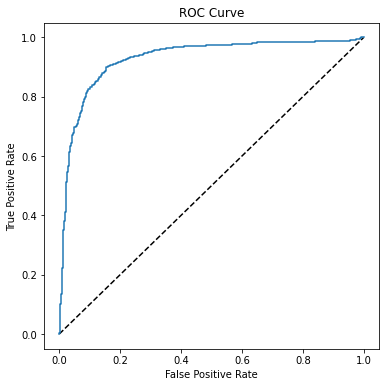

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_val_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


In [ ]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test,y_val_scores[:,1])
print('AUC: ' + str(auc))

AUC: 0.9277420610157942


In [ ]:
resultsLogisticRegression = pd.DataFrame({'Train Accuracy': accuracy_score(y_train, predictions_train),
              'Test Accuracy': accuracy_score(y_test, predictions_val),
              'Train F1 Score':f1_score(y_train, predictions_train),
              'Test F1 Score':f1_score(y_test, predictions_val),
              'Train Precision':precision_score(y_train, predictions_train),
              'Test Precision': precision_score(y_test, predictions_val),
              'Train Recall':recall_score(y_train, predictions_train),
              'Test Recall': recall_score(y_test, predictions_val),
              'ROC AUC':auc},
             index=['LogisticRegression'])
resultsLogisticRegression

,Train Accuracy,Test Accuracy,Train F1 Score,Test F1 Score,Train Precision,Test Precision,Train Recall,Test Recall,ROC AUC
LogisticRegression,0.871805,0.864947,0.873552,0.863182,0.861802,0.874611,0.885628,0.852049,0.927742


In [ ]:
from sklearn.model_selection import GridSearchCV, LeaveOneOut
parameters = {'penalty':['l1', 'l2'],'C':[1,2,3,4,5,6]} # only L1 and L2 penalty are supported by liblinear

LR_tune = GridSearchCV(estimator=lgr_classifier,
                      param_grid=parameters,
                      cv=LeaveOneOut(),
                      n_jobs=-1)
LR_tune.fit(X_train,y_train)

GridSearchCV(cv=LeaveOneOut(),
             estimator=LogisticRegression(C=100.0, random_state=0,
                                          solver='liblinear'),
             n_jobs=-1,
             param_grid={'C': [1, 2, 3, 4, 5, 6], 'penalty': ['l1', 'l2']})

In [ ]:
LR_tune.best_params_

{'C': 3, 'penalty': 'l2'}

In [ ]:
LR_tune.best_estimator_.score(X_train,y_train)

0.8718045824654421

In [ ]:
LR_tune.best_estimator_.score(X_test,y_test)

0.8649468892261002

In [ ]:
from sklearn import metrics

metrics.confusion_matrix(y_true=y_train,y_pred=LR_tune.best_estimator_.predict(X_train))

array([[4531,  750],
       [ 604, 4677]])

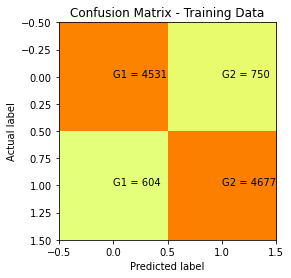

In [ ]:
cm = metrics.confusion_matrix(y_true=y_train,y_pred=LR_tune.best_estimator_.predict(X_train))
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
plt.title('Confusion Matrix - Training Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

s = [['G1', 'G2'], ['G1','G2']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [ ]:
## Model evaluation on the test data
print(metrics.classification_report(y_true=y_test,y_pred=LR_tune.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1318
           1       0.87      0.85      0.86      1318

    accuracy                           0.86      2636
   macro avg       0.87      0.86      0.86      2636
weighted avg       0.87      0.86      0.86      2636



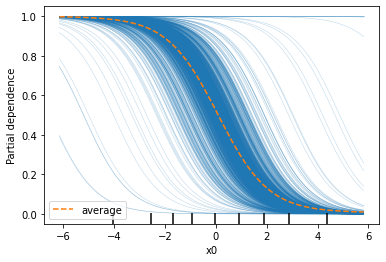

In [ ]:
from sklearn.inspection import PartialDependenceDisplay
features =[0]
PartialDependenceDisplay.from_estimator(lgr_classifier, X_train, features,kind='both')


<Axes: title={'center': 'Feature Importance'}>

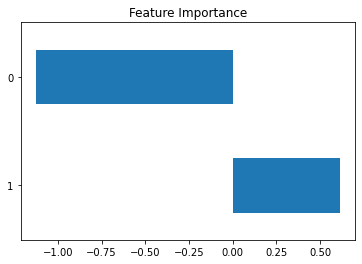

In [ ]:
from sklearn.inspection import permutation_importance
importance = lgr_classifier.coef_[0]
feat_importances = pd.Series(importance)
feat_importances.nlargest(20).plot(kind='barh',title = 'Feature Importance')

#Support Vector Machines

In [ ]:
from sklearn.svm import SVC

# Initialize SVM classifier
svm_clf = SVC(kernel='rbf',probability=True,random_state = 0) #sigmoid and linear don't perform as good as rbf and same was checked on this data

# Fit data
svm_clf = svm_clf.fit(X_train, y_train)

# Predict the test set
predictions = svm_clf.predict(X_test)
predictions

array([0, 0, 0, ..., 1, 1, 0])

In [ ]:
predictions_val = svm_clf.predict(X_test)
predictions_train = svm_clf.predict(X_train)
print('Validation Predicted labels: ', predictions_val)
print('Valdation Actual labels:    ' ,y_test)

print('Training Predicted labels: ', predictions_train)
print('Training Actual labels:    ' ,y_train)

Validation Predicted labels:  [0 0 0 ... 1 1 0]
Valdation Actual labels:     0       0
1       0
2       0
3       0
4       1
       ..
2631    1
2632    1
2633    1
2634    1
2635    1
Name: Bankrupt?, Length: 2636, dtype: int64
Training Predicted labels:  [0 0 0 ... 1 1 1]
Training Actual labels:     0        0
1        0
2        0
3        0
4        0
        ..
10557    1
10558    1
10559    1
10560    1
10561    1
Name: Bankrupt?, Length: 10562, dtype: int64


In [ ]:
print('Accuracy for training data: ', svm_clf.score(X_train,y_train))
print('Accuracy for validation data: ', svm_clf.score(X_test,y_test))

Accuracy for training data:  0.879094868396137
Accuracy for validation data:  0.8763277693474962


In [ ]:
#OR
print('Accuracy for validation data: ', accuracy_score(y_test, predictions_val))
print('Accuracy for training data: ', accuracy_score(y_train, predictions_train))

Accuracy for validation data:  0.8763277693474962
Accuracy for training data:  0.879094868396137


In [ ]:
from sklearn. metrics import classification_report

print('Validation Data Classification Report \n', classification_report(y_test, predictions_val))
print('Train Data Classification Report \n', classification_report(y_train, predictions_train))

Validation Data Classification Report 
               precision    recall  f1-score   support

           0       0.88      0.87      0.88      1318
           1       0.87      0.89      0.88      1318

    accuracy                           0.88      2636
   macro avg       0.88      0.88      0.88      2636
weighted avg       0.88      0.88      0.88      2636

Train Data Classification Report 
               precision    recall  f1-score   support

           0       0.91      0.84      0.87      5281
           1       0.85      0.91      0.88      5281

    accuracy                           0.88     10562
   macro avg       0.88      0.88      0.88     10562
weighted avg       0.88      0.88      0.88     10562



In [ ]:
from sklearn.metrics import f1_score

In [ ]:
#calculate F1 score
print('F1 Score over Validation Data',f1_score(y_test, predictions_val))
#calculate F1 score
print('F1 Score over Test data', f1_score(y_train, predictions_train))

F1 Score over Validation Data 0.8774436090225564
F1 Score over Test data 0.883090725991028


In [ ]:
from sklearn.metrics import precision_score, recall_score

print('Validation Data Metrics\n')
print("Overall Precision:",precision_score(y_test, predictions_val))
print("Overall Recall:",recall_score(y_test, predictions_val))
print('\nTrain Data Metrics\n')
print("Overall Precision:",precision_score(y_train, predictions_train))
print("Overall Recall:",recall_score(y_train, predictions_train))

Validation Data Metrics

Overall Precision: 0.8695976154992549
Overall Recall: 0.8854324734446131

Train Data Metrics

Overall Precision: 0.8548387096774194
Overall Recall: 0.9132740011361484


In [ ]:
from sklearn.metrics import confusion_matrix

# Print the confusion matrix
print('\nValidation Data Confusion Matrix')
val_cm = confusion_matrix(y_test, predictions_val)
print (val_cm)

# Print the confusion matrix
print('\nTrain Data Confusion Matrix')
train_cm = confusion_matrix(y_train, predictions_train)
print (train_cm)


Validation Data Confusion Matrix
[[1143  175]
 [ 151 1167]]

Train Data Confusion Matrix
[[4462  819]
 [ 458 4823]]


In [ ]:
y_val_scores = svm_clf.predict_proba(X_test)
print(y_val_scores)

y_train_scores = svm_clf.predict_proba(X_train)
print(y_train_scores)

[[0.63279619 0.36720381]
 [0.980383   0.019617  ]
 [0.96453922 0.03546078]
 ...
 [0.06812748 0.93187252]
 [0.13584499 0.86415501]
 [0.71950857 0.28049143]]
[[0.61895738 0.38104262]
 [0.92753139 0.07246861]
 [0.95070068 0.04929932]
 ...
 [0.05734064 0.94265936]
 [0.08211792 0.91788208]
 [0.09287796 0.90712204]]


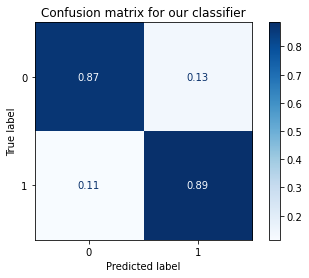

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay #45
# Generate confusion matrix
matrix = ConfusionMatrixDisplay.from_estimator(svm_clf, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Confusion matrix for our classifier')
plt.show(matrix)
plt.show()

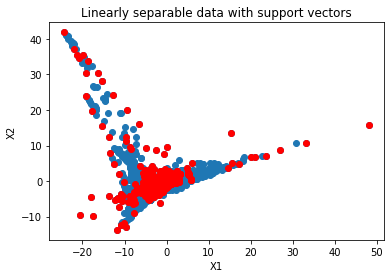

In [ ]:
# Get support vectors
support_vectors = svm_clf.support_vectors_

# Visualize support vectors
plt.scatter(X_train[:,0], X_train[:,1])
plt.scatter(support_vectors[:,0], support_vectors[:,1], color='red')
plt.title('Linearly separable data with support vectors')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

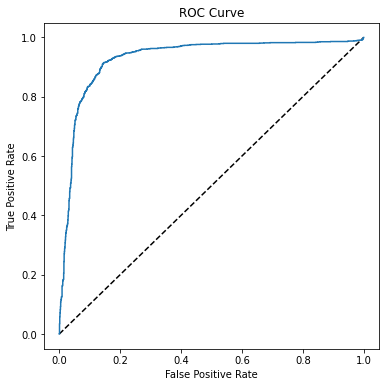

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_val_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test,y_val_scores[:,1])
print('ROC AUC: ' + str(auc))

ROC AUC: 0.928537053198275


In [ ]:
resultsSVMClassifier = pd.DataFrame({'Train Accuracy': accuracy_score(y_train, predictions_train),
              'Test Accuracy': accuracy_score(y_test, predictions_val),
              'Train F1 Score':f1_score(y_train, predictions_train),
              'Test F1 Score':f1_score(y_test, predictions_val),
              'Train Precision':precision_score(y_train, predictions_train),
              'Test Precision': precision_score(y_test, predictions_val),
              'Train Recall':recall_score(y_train, predictions_train),
              'Test Recall': recall_score(y_test, predictions_val),
              'ROC AUC':auc},
             index=['SVMClassifier'])
resultsSVM_Logistic=resultsLogisticRegression.append(resultsSVMClassifier)

<ipython-input-53-ab86e9af8c79>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsSVM_Logistic=resultsLogisticRegression.append(resultsSVMClassifier)


In [ ]:
from sklearn.inspection import PartialDependenceDisplay


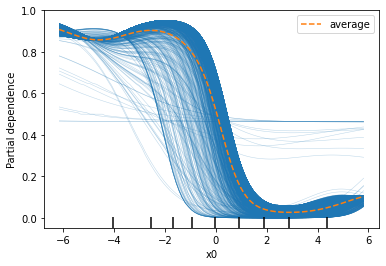

In [ ]:
features =[0]
PartialDependenceDisplay.from_estimator(svm_clf, X_train, features,kind='both')

In [ ]:
resultsSVM_Logistic

,Train Accuracy,Test Accuracy,Train F1 Score,Test F1 Score,Train Precision,Test Precision,Train Recall,Test Recall,ROC AUC
LogisticRegression,0.871805,0.864947,0.873552,0.863182,0.861802,0.874611,0.885628,0.852049,0.927742
SVMClassifier,0.879095,0.876328,0.883091,0.877444,0.854839,0.869598,0.913274,0.885432,0.928537


#Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
# training the model on training set
gnb_model = gnb.fit(X_train, y_train)
 
# making predictions on the testing set
y_pred_gnb = gnb_model.predict(X_test)
 
# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred_gnb)*100)

Gaussian Naive Bayes model accuracy(in %): 78.33839150227617


In [ ]:
predictions_val = gnb_model.predict(X_test)
predictions_train = gnb_model.predict(X_train)
print('Validation Predicted labels: ', predictions_val)
print('Valdation Actual labels:    ' ,y_test)

print('Training Predicted labels: ', predictions_train)
print('Training Actual labels:    ' ,y_train)

Validation Predicted labels:  [0 0 0 ... 1 1 0]
Valdation Actual labels:     0       0
1       0
2       0
3       0
4       1
       ..
2631    1
2632    1
2633    1
2634    1
2635    1
Name: Bankrupt?, Length: 2636, dtype: int64
Training Predicted labels:  [0 0 0 ... 1 1 1]
Training Actual labels:     0        0
1        0
2        0
3        0
4        0
        ..
10557    1
10558    1
10559    1
10560    1
10561    1
Name: Bankrupt?, Length: 10562, dtype: int64


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
print('Accuracy for validation data: ', accuracy_score(y_test, predictions_val))
print('Accuracy for training data: ', accuracy_score(y_train, predictions_train))

Accuracy for validation data:  0.7833839150227617
Accuracy for training data:  0.766048096951335


In [ ]:
predictions_train = gnb_model.predict(X_train)
#model_train_score = gnb_model.score(X_train, y_train)                    ## Accuracy
#print(model_train_score)
print(metrics.confusion_matrix(y_train, predictions_train))          ## confusion_matrix
print(metrics.classification_report(y_train, predictions_train))     ## classification_report

[[4864  417]
 [2054 3227]]
              precision    recall  f1-score   support

           0       0.70      0.92      0.80      5281
           1       0.89      0.61      0.72      5281

    accuracy                           0.77     10562
   macro avg       0.79      0.77      0.76     10562
weighted avg       0.79      0.77      0.76     10562



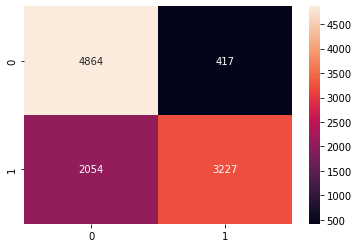

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train, predictions_train)
f = sns.heatmap(cm, annot=True, fmt='d')

In [ ]:
predictions_val = gnb_model.predict(X_test)
#model_score = gnb_model.score(X_test, y_test)                    ## Accuracy
#print(model_score)
print(metrics.confusion_matrix(y_test, predictions_val))         ## confusion_matrix
print(metrics.classification_report(y_test, predictions_val))    ## classification_report

[[1226   92]
 [ 479  839]]
              precision    recall  f1-score   support

           0       0.72      0.93      0.81      1318
           1       0.90      0.64      0.75      1318

    accuracy                           0.78      2636
   macro avg       0.81      0.78      0.78      2636
weighted avg       0.81      0.78      0.78      2636



In [ ]:
from sklearn.metrics import f1_score

#calculate F1 score
print('F1 Score over Validation Data',f1_score(y_test, predictions_val))
#calculate F1 score
print('F1 Score over Test data', f1_score(y_train, predictions_train))

F1 Score over Validation Data 0.7461093819475322
F1 Score over Test data 0.7231372549019609


In [ ]:
from sklearn.metrics import precision_score, recall_score

print('Validation Data Metrics\n')
print("Overall Precision:", precision_score(y_test, predictions_val))
print("Overall Recall:", recall_score(y_test, predictions_val))
print('\nTrain Data Metrics\n')
print("Overall Precision:", precision_score(y_train, predictions_train))
print("Overall Recall:", recall_score(y_train, predictions_train))

Validation Data Metrics

Overall Precision: 0.9011815252416756
Overall Recall: 0.6365705614567526

Train Data Metrics

Overall Precision: 0.8855653128430296
Overall Recall: 0.6110585116455217


In [ ]:
y_val_scores = gnb_model.predict_proba(X_test)
print(y_val_scores)

y_train_scores = gnb_model.predict_proba(X_train)
print(y_train_scores)

[[0.61477062 0.38522938]
 [0.93203378 0.06796622]
 [0.88951451 0.11048549]
 ...
 [0.37152154 0.62847846]
 [0.03746873 0.96253127]
 [0.80256057 0.19743943]]
[[0.6015603  0.3984397 ]
 [0.87977446 0.12022554]
 [0.94237691 0.05762309]
 ...
 [0.45756969 0.54243031]
 [0.28664278 0.71335722]
 [0.48177682 0.51822318]]


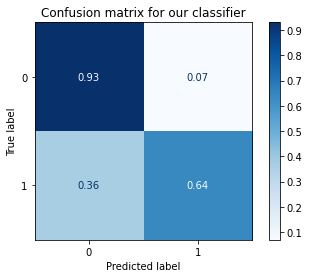

In [ ]:
# Generate confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
matrix = ConfusionMatrixDisplay.from_estimator(gnb_model, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Confusion matrix for our classifier')
plt.show(matrix)
plt.show()

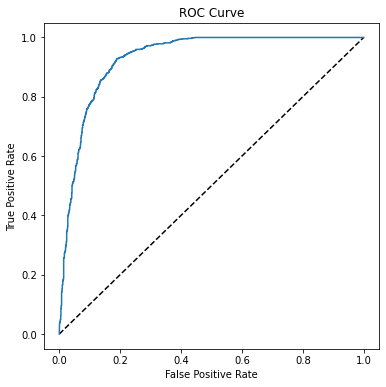

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_val_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test,y_val_scores[:,1])
print('AUC: ' + str(auc))

AUC: 0.9294491930340034


In [ ]:
resultsNaiveBayesClassifier = pd.DataFrame({'Train Accuracy': accuracy_score(y_train, predictions_train),
              'Test Accuracy': accuracy_score(y_test, predictions_val),
              'Train F1 Score':f1_score(y_train, predictions_train),
              'Test F1 Score':f1_score(y_test, predictions_val),
              'Train Precision':precision_score(y_train, predictions_train),
              'Test Precision': precision_score(y_test, predictions_val),
              'Train Recall':recall_score(y_train, predictions_train),
              'Test Recall': recall_score(y_test, predictions_val),
              'ROC AUC':auc},
             index=['NaiveBayesClassifier'])
resultsNaive_SVM_Logistic=resultsSVM_Logistic.append(resultsNaiveBayesClassifier)

<ipython-input-70-a9e2afc58958>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsNaive_SVM_Logistic=resultsSVM_Logistic.append(resultsNaiveBayesClassifier)


In [ ]:
resultsNaive_SVM_Logistic

,Train Accuracy,Test Accuracy,Train F1 Score,Test F1 Score,Train Precision,Test Precision,Train Recall,Test Recall,ROC AUC
LogisticRegression,0.871805,0.864947,0.873552,0.863182,0.861802,0.874611,0.885628,0.852049,0.927742
SVMClassifier,0.879095,0.876328,0.883091,0.877444,0.854839,0.869598,0.913274,0.885432,0.928537
NaiveBayesClassifier,0.766048,0.783384,0.723137,0.746109,0.885565,0.901182,0.611059,0.636571,0.929449


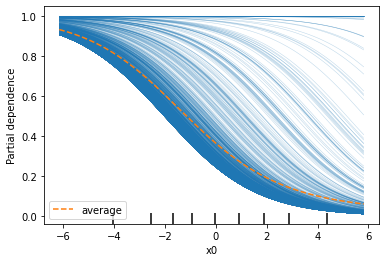

In [ ]:
from sklearn.inspection import PartialDependenceDisplay
features =[0]
PartialDependenceDisplay.from_estimator(gnb_model, X_train, features,kind='both')

[0.23975721 0.01320182]


Text(0.5, 0, 'Feature Importance')

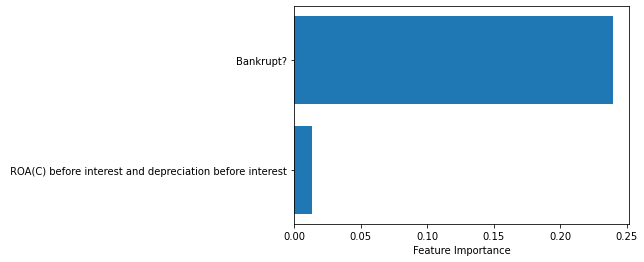

In [ ]:
from sklearn.inspection import permutation_importance
imps = permutation_importance(gnb, X_test, y_test)
print(imps.importances_mean)
sort = imps.importances_mean.argsort()
plt.barh(data.columns[sort], imps.importances_mean[sort])
plt.xlabel("Feature Importance")


#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from numpy import mean, std

rf_clf = RandomForestClassifier(random_state=8)

In [ ]:
rf_clf_cv_score=cross_val_score(rf_clf, X_train, y_train)
print("Cross Validation Scores are {}".format(rf_clf_cv_score))
print("Average Cross Validation score on Train Data :{}".format(rf_clf_cv_score.mean()))
print('Accuracy score on Train Data: %.3f +/- (%.3f)' % (mean(rf_clf_cv_score), std(rf_clf_cv_score)))

Cross Validation Scores are [0.86890677 0.88263133 0.87689394 0.88683712 0.87878788]
Average Cross Validation score on Train Data :0.8788114073771315
Accuracy score on Train Data: 0.879 +/- (0.006)


In [ ]:
from sklearn.model_selection import cross_val_predict
predtrain_rf_cv_clf = cross_val_predict(rf_clf, X_train,y_train)
print('Prediction on Train Data', predtrain_rf_cv_clf)

Prediction on Train Data [0 0 0 ... 1 1 1]


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
print('RMSE for Train Data', mean_squared_error(y_train, predtrain_rf_cv_clf,squared=False))

RMSE for Train Data 0.3481223473407673


In [ ]:
predval_rf_cv_clf = cross_val_predict(rf_clf, X_test,y_test)
print('Prediction on Validation Data', predval_rf_cv_clf)

Prediction on Validation Data [0 0 0 ... 1 1 1]


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
print('RMSE for Validation Data', mean_squared_error(y_test,predval_rf_cv_clf,squared=False))

RMSE for Validation Data 0.32938992671904177


In [ ]:
rf_param = {'criterion':['gini','entropy'], 'n_estimators':[408, 608],'max_features':["auto", "sqrt", "log2"], 'max_depth':[600, 700]}
rf_clf_tune = GridSearchCV(estimator=rf_clf, param_grid=rf_param, scoring='f1', n_jobs=-1)

In [ ]:
rf_clf_tune.fit(X_train,y_train)
rf_clf_tune.best_estimator_

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(criterion='entropy', max_depth=600, max_features='auto',
                       n_estimators=608, random_state=8)

In [ ]:
from sklearn.inspection import permutation_importance

In [ ]:
rf_clf_tune.best_estimator_.feature_importances_

array([0.67911079, 0.32088921])

In [ ]:
p=permutation_importance(rf_clf_tune,X_test,y_test)

Text(0.5, 0, 'Feature Importance')

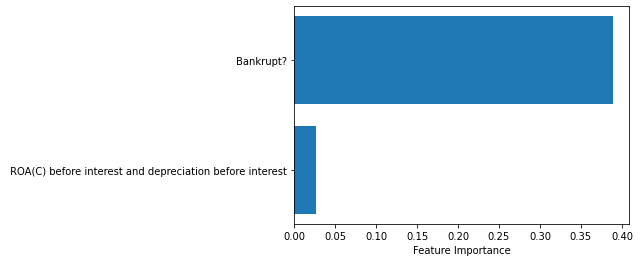

In [ ]:
sorted_indx=p.importances_mean.argsort()
plt.barh(data.columns[sort], p.importances_mean[sorted_indx])
plt.xlabel("Feature Importance")

Text(0.5, 0, 'Feature Importance')

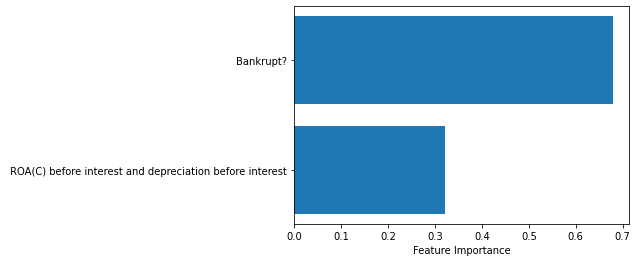

In [ ]:
sort = rf_clf_tune.best_estimator_.feature_importances_.argsort()
plt.barh(data.columns[sort], rf_clf_tune.best_estimator_.feature_importances_[sort])
plt.xlabel("Feature Importance")

In [ ]:
feat_importances = rf_clf_tune.best_estimator_.feature_importances_
print(rf_clf_tune.best_estimator_.feature_importances_)

[0.67911079 0.32088921]


#Decision Trees

In [ ]:
from sklearn.model_selection import GridSearchCV, LeaveOneOut
from sklearn.tree import DecisionTreeClassifier
from numpy import mean, std

dt_clf = DecisionTreeClassifier(random_state=8)
dt_clf_cv_score=cross_val_score(dt_clf, X_train, y_train)

print("Cross Validation Scores over Train Data are {}".format(dt_clf_cv_score))
print("Average Cross Validation score on Train Data :{}".format(dt_clf_cv_score.mean()))
print('Accuracy score on Train Data: %.3f +/- (%.3f)' % (mean(dt_clf_cv_score), std(dt_clf_cv_score)))

Cross Validation Scores over Train Data are [0.83199243 0.84902982 0.84895833 0.8532197  0.85369318]
Average Cross Validation score on Train Data :0.8473786910754493
Accuracy score on Train Data: 0.847 +/- (0.008)


In [ ]:
dt_predtrain_cv_clf = cross_val_predict(dt_clf, X_train,y_train)
print('Prediction on Train Data', dt_predtrain_cv_clf)

from sklearn.metrics import mean_squared_error, r2_score
print('RMSE for Train Data', mean_squared_error(y_train, dt_predtrain_cv_clf,squared=False))

dt_predval_cv_clf = cross_val_predict(dt_clf, X_test,y_test)
print('Prediction on Validation Data', dt_predval_cv_clf)

from sklearn.metrics import mean_squared_error, r2_score
print('RMSE for Validation Data', mean_squared_error(y_test,dt_predval_cv_clf,squared=False))

Prediction on Train Data [0 0 0 ... 0 1 1]
RMSE for Train Data 0.390669437445891
Prediction on Validation Data [1 0 0 ... 1 1 1]
RMSE for Validation Data 0.37057966322800157


In [ ]:
dt_param = {'criterion':['gini','entropy'], 'max_features':["sqrt", "log2"], 'max_depth':[5,6,7,8]}
dt_clf_tune = GridSearchCV(estimator=dt_clf, param_grid=dt_param, scoring='f1', n_jobs=-1)
dt_clf_tune_model = dt_clf_tune.fit(X_train, y_train)

In [ ]:
dt_clf_tune.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=6, max_features='sqrt',
                       random_state=8)

In [ ]:
#print(rf_clf_tune.cv_results_)
print('Best Parameters:',dt_clf_tune.best_params_)
print("Best Model's Score", dt_clf_tune.best_score_)

Best Parameters: {'criterion': 'entropy', 'max_depth': 6, 'max_features': 'sqrt'}
Best Model's Score 0.8813243250535308


In [ ]:
#print(rf_clf_tune.cv_results_)
print('Best Parameters:',dt_clf_tune.best_params_)
print("Best Model's Score", dt_clf_tune.best_score_)

Best Parameters: {'criterion': 'entropy', 'max_depth': 6, 'max_features': 'sqrt'}
Best Model's Score 0.8813243250535308


In [ ]:
dt_clf_tune_cv_trainscore=cross_val_score(dt_clf_tune.best_estimator_, X_train, y_train)

print("Cross Validation Scores over Train Data are {}".format(dt_clf_tune_cv_trainscore))
print("Average Cross Validation score on Train Data :{}".format(dt_clf_tune_cv_trainscore.mean()))
print('Accuracy score on Train Data: %.3f +/- (%.3f)' % (mean(dt_clf_tune_cv_trainscore), std(dt_clf_tune_cv_trainscore)))

predtrain_dt_clf_tune= dt_clf_tune.best_estimator_.predict(X_train)
print('Prediction on Train Data', predtrain_dt_clf_tune)

from sklearn.metrics import mean_squared_error, r2_score
print('RMSE for Train Data with Best Model', mean_squared_error(y_train,predtrain_dt_clf_tune,squared=False))

dt_clf_tune_cv_valscore=cross_val_score(dt_clf_tune.best_estimator_, X_test, y_test)

print("Cross Validation Scores over Test Data are {}".format(dt_clf_tune_cv_valscore))
print("Average Cross Validation score on Test Data :{}".format(dt_clf_tune_cv_valscore.mean()))
print('Accuracy score on Test Data: %.3f +/- (%.3f)' % (mean(dt_clf_tune_cv_valscore), std(dt_clf_tune_cv_valscore)))

predval_dt_clf_tune = dt_clf_tune.best_estimator_.predict(X_test)
print('Prediction on Validation Data', predval_dt_clf_tune)

from sklearn.metrics import mean_squared_error, r2_score
print('RMSE for Validation Data with Best Model', mean_squared_error(y_test,predval_dt_clf_tune,squared=False))

Cross Validation Scores over Train Data are [0.87221959 0.88547089 0.86979167 0.87594697 0.88020833]
Average Cross Validation score on Train Data :0.8767274914311118
Accuracy score on Train Data: 0.877 +/- (0.006)
Prediction on Train Data [0 0 0 ... 1 1 1]
RMSE for Train Data with Best Model 0.33424731100182165
Cross Validation Scores over Test Data are [0.86742424 0.89373814 0.87096774 0.88804554 0.88235294]
Average Cross Validation score on Test Data :0.8805057213501236
Accuracy score on Test Data: 0.881 +/- (0.010)
Prediction on Validation Data [0 0 0 ... 1 1 0]
RMSE for Validation Data with Best Model 0.36386477169259934


In [ ]:
from sklearn.metrics import precision_score, recall_score

print('Validation Data Metrics\n')
print("Overall Precision:",precision_score(y_test, predval_dt_clf_tune))
print("Overall Recall:",recall_score(y_test, predval_dt_clf_tune))
print('\nTrain Data Metrics\n')
print("Overall Precision:",precision_score(y_train, predtrain_dt_clf_tune))
print("Overall Recall:",recall_score(y_train, predtrain_dt_clf_tune))

Validation Data Metrics

Overall Precision: 0.8764568764568764
Overall Recall: 0.8558421851289834

Train Data Metrics

Overall Precision: 0.8700595560368165
Overall Recall: 0.9128952849839046


In [ ]:
from sklearn.metrics import f1_score
#calculate F1 score
print('F1 Score over Validation Data',f1_score(y_test, predval_dt_clf_tune))
#calculate F1 score
print('F1 Score over Test data', f1_score(y_train, predtrain_dt_clf_tune))

F1 Score over Validation Data 0.8660268714011516
F1 Score over Test data 0.8909628534466827
